In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import os
import sys

sys.path.append(os.path.dirname(os.path.abspath(os.path.abspath(""))))

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.sparse import random
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# Lectura del dataset y separación entre los datos independientes (predictores) y dependientes (target)

df_heart = pd.read_csv("../data/heart.csv")

df_heart.head()

# Guardamos nuestro dataset sin la columna target
df_features = df_heart.drop(["target"], axis=1)

df_target = df_heart["target"]

Normalización de datos (paso indispensable para utilizar de forma correcta PCA) y creación de datos particiones de entrenamiento y testing.


In [5]:
df_features = StandardScaler().fit_transform(df_features)

# Partimos el conjunto de entrenamiento.
# Para añadir replicabilidad usamos el random state
X_train, X_test, y_train, y_test = train_test_split(
    df_features, df_target, test_size=0.3, random_state=42
)

print(X_train.shape)
print(y_train.shape)

(717, 13)
(717,)


Nota sobre el funcionamiento de StandardScaler de Sklearn

La estandarizacion que hace sklearn con StandardScaler es:

z = (x - u) / s

x = valor

u = media

s = desviacion estandar

Partimos el conjunto de entrenamiento.

`X`: representa los features. Normalmente, es una matriz, por eso la mayúscula.

`y`: representa el target. Siempre es un vector, nunca una matriz, por eso la minúscula.

Para añadir replicabilidad usamos el random state
`random_state`: es para dejar estáticos los valores aleatorios que te genera, de forma que al volverlo a correr siga trabajando con esos valores aleatorios y no te genere nuevos valores aleatorios.


# Implementación del Algoritmo PCA e IPCA


Empecemos por instanziar un modelo de clasificación que nos sirva para comparar el rendimiento de nuestros nuevos features utilizando PCA


In [6]:
# configuración de la regresion logistica

logistic = LogisticRegression(solver="lbfgs", max_iter=1000)

Ahora entrenemos a nuestro algoritmo PCA con nuestros datos de entrada, algo importante a mencionar es que por defecto el número de componentes que utiliza PCA es el mínimo entre la cantidad de muestras y la cantidad de features, pero en general nosotros buscamos tener un valor más pequeño que el número de features de tener el mismo entonces no tendría mucho sentido usar PCA.


In [7]:
# PCA
# Llamamos y configuramos nuestro algoritmo PCA
# El numero de componentes es opcional
# Sino le pasamos el numero de componentes, PCA lo asignara de esta forma:
# a: n_components = min(n_muestras, n_features)

pca = PCA(n_components=3)
# Entranando algoritmo de PCA
pca.fit(X_train)

PCA(n_components=3)

Ahora que nuestro algoritmo de PCA ha sido entrenado, debemos transformar nuestros datos de dependientes (X) de entrenamiento y validación utilizando PCA esto para que el modelo de regresión logística NO utilice las 13 features originales, sino en este caso solamente 3.


In [8]:
# configuramos los datos de entrenamiento con PCA
df_train = pca.transform(X_train)
df_test = pca.transform(X_test)
# Entrenamos la regresion logistica con datos del PCA
logistic.fit(df_train, y_train)

LogisticRegression(max_iter=1000)

Finalmente, podemos observar cuál es el Accuracy de nuestro modelo.


In [9]:
print("Score / Accuracy PCA: ", logistic.score(df_test, y_test))

Score / Accuracy PCA:  0.7857142857142857


Ahora podemos repetir la metodología pero para IPCA y comparar los resultados:


In [10]:
# IPCA
# Haremos una comparacion con incremental PCA, haremos lo mismo para el IPCA.
# El parametro batch_size es opcional, se usa para crear pequeños bloques,
# De esta forma podemos ir entrenando poco a poco y combinarlos en el resultado final.

ipca = IncrementalPCA(n_components=3, batch_size=10)
# Entrenamos el algoritmo IPCA
ipca.fit(X_train)

# Configuramos los datos de entrenamiento con IPCA
df_train = ipca.transform(X_train)
df_test = ipca.transform(X_test)

# Entrenamos la regresion logistica con datos del IPCA
logistic.fit(df_train, y_train)

print("Score / Accuracy IPCA: ", logistic.score(df_test, y_test))

Score / Accuracy IPCA:  0.8051948051948052


Comparar el accuracy de PCA e IPCA utilizando diferentes valores en n_components


I'm working on PCA
PCA with n_components=1 - Accuracy: 0.7694805194805194
PCA with n_components=2 - Accuracy: 0.7987012987012987
PCA with n_components=3 - Accuracy: 0.7857142857142857
PCA with n_components=4 - Accuracy: 0.8214285714285714
PCA with n_components=5 - Accuracy: 0.827922077922078
PCA with n_components=6 - Accuracy: 0.8181818181818182
PCA with n_components=7 - Accuracy: 0.8181818181818182
PCA with n_components=8 - Accuracy: 0.8181818181818182
PCA with n_components=9 - Accuracy: 0.8376623376623377
PCA with n_components=10 - Accuracy: 0.801948051948052
PCA with n_components=11 - Accuracy: 0.801948051948052
PCA with n_components=12 - Accuracy: 0.8051948051948052
PCA with n_components=13 - Accuracy: 0.8051948051948052
I'm working on IPCA
IPCA with n_components=1 - Accuracy: 0.7694805194805194
IPCA with n_components=2 - Accuracy: 0.7987012987012987
IPCA with n_components=3 - Accuracy: 0.7987012987012987
IPCA with n_components=4 - Accuracy: 0.7987012987012987
IPCA with n_component

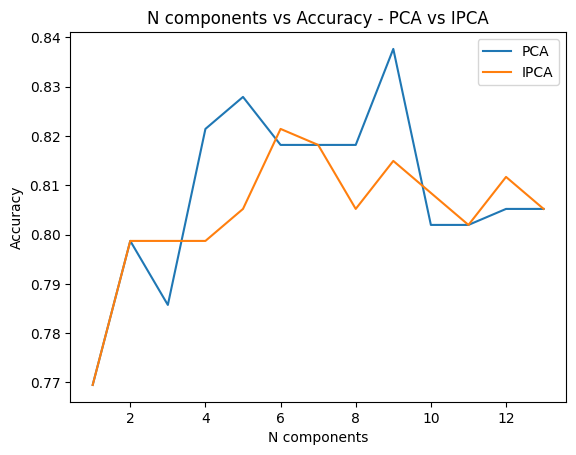

In [11]:
max_features = X_train.shape[1]  # El maximo numero de features en este caso seria de 13
pca_data = {"accuracy": [], "n_components": []}
ipca_data = {"accuracy": [], "n_components": []}

# PCA
print("I'm working on PCA")
for n in range(1, max_features + 1):
    pca = PCA(n_components=n)
    pca.fit(X_train)
    df_train = pca.transform(X_train)
    df_test = pca.transform(X_test)
    logistic.fit(df_train, y_train)
    accuracy = logistic.score(df_test, y_test)
    print(f"PCA with n_components={n} - Accuracy: {accuracy}")
    pca_data["accuracy"].append(accuracy)
    pca_data["n_components"].append(n)

# IPCA
print("I'm working on IPCA")
for n in range(1, max_features + 1):
    ipca = IncrementalPCA(n_components=n, batch_size=13)
    ipca.fit(X_train)
    df_train = ipca.transform(X_train)
    df_test = ipca.transform(X_test)
    logistic.fit(df_train, y_train)
    accuracy = logistic.score(df_test, y_test)
    print(f"IPCA with n_components={n} - Accuracy: {accuracy}")
    ipca_data["accuracy"].append(accuracy)
    ipca_data["n_components"].append(n)

# Graficamos los resultados
plt.plot(pca_data["n_components"], pca_data["accuracy"], label="PCA")
plt.plot(ipca_data["n_components"], ipca_data["accuracy"], label="IPCA")
plt.title("N components vs Accuracy - PCA vs IPCA")
plt.xlabel("N components")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Conclusión

El rendimiento de los dos algoritmos es casi exactamente el mismo, pero hay que considerar que nuestro dataset tenia 13 fetures originalmente para intentar predecir una clasificación binaria y utilizando PCA, solo tuvimos que utilizar 3 features artificiales que fueron los que nos devolvió PCA para llegar a un resultado coste computacional y estamos utilizando información que es realmente relevante para nuestro modelo. Finalmente, la gráfica revela que el mejor resultado de clasificación se obtiene con PCA utilizando únicamente 7 componentes, demostrando que es completamente posible que un modelo con menos features pueda obtener resultados iguales o incluso mejores que un modelo con mayor cantidad de features.
